<h2> <center> RELATÓRIO DOS EXPERIMENTOS E RESULTADOS DO TCC DE GUILHERME PASSOS </center> </h2>
<h3> INTRODUÇÃO </h3>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial">  Este trabalho tem como objetivo realizar uma análise de dados dos preços de apartamentos da cidade de Belo Horizonte e desenvolver um modelo computacional preditivo capaz de prever tais preços. Para tal, obteve-se um conjunto de dados composto por aproximadamente 57 mil anúncios de imóveis entre os meses agosto e outubro de 2018.</div>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Alguns kernels do problema <a href=https://www.kaggle.com/c/house-prices-advanced-regression-techniques>House Prices: Advanced Regression Techniques</a> do portal Kaggle foram utilizados como referência dos experimentos mostrados a seguir. Em especial os kernels: </div>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial">  <ol>
    <li> <a href=https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard>Stacked Regressions : Top 4% on LeaderBoard </a> de Serigne.</li> 
 <li> <a href=https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python>Comprehensive data exploration with Python </a> de Pedro Marcelino.</li></ol> </div>

    
> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial">  A análise de dados realizada neste trabalho se restringiu apenas à preços de apartamentos devido à grande quantidade de anúncios e pela dificuldade em se criar um modelo genérico para diferentes tipos de imóveis. Os resultados finais obtidos foram satisfatoriamente validados  e demonstraram que a modelagem do problema realizada neste trabalho pode ser útil ao setor imobiliário da cidade.</div>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Este relatório está dividido nas seguintes etapas:
> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> <ul>
    <li><b> Obtenção dos dados</b> utilizando um web crawler. </li>
    <li><b> Exclusão</b> dos dados que possuem informações inconsistentes. </li>
    <li><b> Organização</b> dos conjuntos de treino e teste. </li>
    <li><b> Determinação</b> das características relevantes e <b>criação</b> de uma distribuição geofráfica de preços utilizando as informações de latitude e longitude de cada apartamento.</li>
    <li><b> Transformação Box Cox</b> nas variáveis que possuem distribuições altamente assimétricas. 
    </li>
    <li><b> Predição</b> dos preços do conjunto teste utilizando os principais modelos de regressão da bibloteca <a href=http://scikit-learn.org/stable/>scikit-learn</a>. 
    </div>


<h3> 1. OBTENÇÃO DOS DADOS </h3>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Os dados foram obtidos utilizando o script contido neste <a href= https://github.com/gpass0s/RedeNetImoveis-Scraping-WebCrawler>repositório.</a></div> 

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Inicialmente, foram realizadas seis extrações no portal da Rede NetImóveis nos dias 05/08/2018, 12/08/2018, 21/08/2018, 25/08/2018 e 29/08/2018 a fim de se obter dados para o compor conjunto de treino dos experimentos. Posteriormente, foi realizada uma extração no dia 12/10/2018 para ser utilizada como conjunto de teste dos experimentos. Os arquvivos csv contendo os dados podem ser visualizados neste <a href=  https://github.com/gpass0s/Graduation_Project>link.</a></div>

> <div style="text-align: justify"> <li><b> Dados obtidos em 05/08/2018: </b></li>

In [1]:
# Dados obtidos em 05/08/2018:
import pandas as pd
data05_08=  pd.read_csv('https://raw.githubusercontent.com/gpass0s/Graduation_Project/master/okData05-08-18.csv', 
                        sep=',',header=0, encoding='utf-8')

data05_08[['Preço','Bairro','Regiao','Area','Qtde_Quartos','Qtde_Banheiros','Qtde_Suites',
           'Vagas_Garagem']].sample(20)

,Preço,Bairro,Regiao,Area,Qtde_Quartos,Qtde_Banheiros,Qtde_Suites,Vagas_Garagem
5744,250000,Sagrada Família,leste,48.00,2,1,0,1
2431,410000,Santo Antônio,centro-sul,90.00,3,2,1,2
3435,260000,Coração Eucarístico,noroeste,75.00,2,1,0,1
73,1250000,Buritis,oeste,277.00,5,4,2,4
213,830000,Pampulha,pampulha,218.00,3,3,1,3
4398,218000,Serra,centro-sul,65.00,2,1,0,1
911,330000,Ipanema,noroeste,143.00,3,1,0,1
2134,751000,Carmo,centro-sul,97.00,3,2,1,2
1344,695000,Serra,centro-sul,120.67,4,2,1,2
5826,220000,Cinquentenário,oeste,47.00,2,1,0,1


In [2]:
# Quantidade de dados obtidos na extração do dia 05/08/2018:
len(data05_08)

6394

> <li><b> Dados obtidos em 12/08/2018: </b></li>

In [3]:
# Quantidade de dados obtidos na extração do dia 12/08/2018:
data12_08= pd.read_csv('https://raw.githubusercontent.com/gpass0s/Graduation_Project/master/okData12-08-18.csv',
                       sep=',',encoding='utf-8')
len(data12_08)

15574

> <li><b> Dados obtidos em 21/08/2018: </b></li>

In [4]:
data21_08= pd.read_csv('https://raw.githubusercontent.com/gpass0s/Graduation_Project/master/okData21-08-18.csv',
                       sep=',',encoding='utf-8')
# Quantidade de dados obtidos na extração do dia 12/08/2018:
len(data21_08)

5674

> <li><b> Dados obtidos em 25/08/2018: </b></li>

In [5]:
data25_08= pd.read_csv('https://raw.githubusercontent.com/gpass0s/Graduation_Project/master/okData25-08-18.csv',
                       sep=',',encoding='utf-8')
# Quantidade de dados obtidos na extração do dia 25/08/2018: 
len(data25_08)

1608

> <li><b> Dados obtidos em 29/08/2018: </b></li>

In [6]:
data29_08= pd.read_csv('https://raw.githubusercontent.com/gpass0s/Graduation_Project/master/okData29-08-18.csv',
                       sep=',',encoding='utf-8')
# Quantidade de dados obtidos na extração do dia 29/08/2018: 
len(data29_08)

8718

> <li><b> Dados obtidos em 21/08/2018: </b></li>

In [7]:
data21_09= pd.read_csv('https://raw.githubusercontent.com/gpass0s/Graduation_Project/master/okData21-09-18.csv',
                       sep=',',encoding='utf-8')
# Quantidade de dados obtidos na extração do dia 29/08/2018: 
len(data21_09)

5666

> <li><b> Dados obtidos em 12/10/2018: </b></li>

In [8]:
data12_10= pd.read_csv('https://raw.githubusercontent.com/gpass0s/Graduation_Project/master/okData12-10-18.csv',
                       sep=',',encoding='utf-8')
# Quantidade de dados obtidos na extração do dia 29/08/2018: 
len(data12_10)

20574

<h3> 2. ORGANIZAÇÃO DOS DADOS </h3>

> <h4> 2.1 EXCLUSÃO DOS DADOS QUE POSSUEM INFORMAÇÕES INCONSISTENTES </h4>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Por meio de uma análise empírica, foi possivel observar que as coordenadas geográficas com latitudes superiores a -19.788 e inferiores a -20.023 bem como aquelas com longitudes superiores a -43.878 e inferiores a -44.055 não estão dentro dos limites da cidade de Belo Horizonte. </div>


In [9]:
# Dados da extração do dia 05/08 que possuem informações de localização inconsistente
data0508_Err =  data05_08.loc[(data05_08['Latitude'] > -19.788) | (data05_08['Latitude'] < -20.023) | 
                   (data05_08['Longitude'] > -43.878) | (data05_08['Longitude'] < -44.055)]

# Dados inconsistentes:
data0508_Err.loc[:,['ImovelID','Latitude','Longitude','Bairro','Regiao']]

,ImovelID,Latitude,Longitude,Bairro,Regiao
46,3248924,-19.950209,-43925.000000,Sion,centro-sul
152,52070,-19.787229,-44.010114,Gutierrez,oeste
271,343831,-19.998399,-44.074770,Tirol,barreiro
334,36010,-10.076442,-67.058649,Belvedere,centro-sul
456,458311,-4.097511,-38.490896,Santo Agostinho,centro-sul
2058,3233886,-19.918422,-43.874673,Floresta,leste
4020,354150,-19.918465,-43.874812,Floresta,leste
4681,172977,-18.922742,-48.295280,Lagoinha,nordeste
5561,3239311,-19.968066,-44.059641,Glalijá,noroeste
5773,46558,-19.960468,-44.077764,Nova Gameleira,oeste


> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Pode se verificar no <a href= https://www.google.com.br/maps>google maps</a> que as coordenadas mostradas acima não correspodem ao bairro e região que se referem. </div>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Além de inconsistência nas informações de localização, alguns dados possuem outras informações incoerentes como quantidade de quartos e banheiros igual a zero ou área inferior a 10m². A função "Drop_MisInformation" a seguir é responsável por excluir todas essas inconsistências.</div>

In [10]:
# Dados da extração do dia 05/08 que possuem quantidade de quartos igual a 0:
dataErr =  data12_08.loc[(data12_08['Qtde_Quartos'] ==0 )]
# Dados inconsistentes:
dataErr.loc[:,['ImovelID','Preço','Area','Qtde_Quartos','Qtde_Banheiros','Bairro']].sample(5)

,ImovelID,Preço,Area,Qtde_Quartos,Qtde_Banheiros,Bairro
4703,115490,290000,99.24,0,1,Santa Mônica
13046,32792,525000,78.00,0,1,Santa Efigênia
1472,3247325,1900000,342.00,0,5,Liberdade
10537,503016,350000,63.14,0,1,Planalto
6999,3256690,620000,160.00,0,4,Grajaú


In [11]:
# A função Drop_Mislocation exclui os dados que possui informações de localização 
# fora do território de Belo Horizonte
def Drop_MisInformation(df):
    df = df.drop(df.loc[(df['Latitude'] > -19.788) | (df['Latitude'] < -20.023) | 
                   (df['Longitude'] > -43.878) | (df['Longitude'] < -44.055)].index)
    
    df = df.drop(df.loc[(df['Qtde_Quartos']==0)].index)
    df = df.drop(df.loc[(df['Qtde_Banheiros']==0)].index)
    df = df.drop(df.loc[(df['Area']<10)].index)
    return df

# Excluindo dados inconsistentes da extração de 05/08/2018:
data05_08 = Drop_MisInformation(data05_08)

# Excluindo dados inconsistentes da extração de 12/08/2018:
data12_08 = Drop_MisInformation(data12_08)

# Excluindo dados inconsistentes da extração de 21/08/2018:
data21_08 = Drop_MisInformation(data21_08)

# Excluindo dados inconsistentes da extração de 25/08/2018:
data25_08 = Drop_MisInformation(data25_08)

# Excluindo dados inconsistentes da extração de 29/08/2018:
data29_08 = Drop_MisInformation(data29_08)

# Excluindo dados inconsistentes da extração de 29/08/2018:
data21_09 = Drop_MisInformation(data21_09)

# Excluindo dados inconsistentes da extração de 29/08/2018:
data12_10 = Drop_MisInformation(data12_10)

> <h4> 2.2 PREPARAÇÃO DO CONJUNTO DE TREINAMENTO </h4>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> A seguir irá se agrupar os dados obtidos em todas as extrações. </div>

In [12]:
# Quantidade de dados obtidos na consolidadação das extrações do dia 05/08/2018 e 12/08/2018:
base_consolidada = pd.concat([data05_08, data12_08]).groupby('ImovelID', as_index=False, sort=False).first()
len(base_consolidada)

15514

In [13]:
# Quantidade de dados novos nas extrações que foram consolidadas:
len(base_consolidada) - len(data05_08)

9191

In [14]:
# Quantidade de dados duplicados nas extrações que foram consolidadas:
len(pd.concat([data05_08, data12_08])) - len(base_consolidada)

6220

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Os resultados anteriores mostram que a extração do dia 12/08/2018 acrescenta 9191 dados novos à extração do dia 05/08/2018. Além disso, são produzidos 6220 valores repetidos na junção dessas extrações. Analisando mais minuciosamente os dados duplicados, por meio da função "CheckingDuplicateValues", observa-se que 130 desses 6220 (ou 2% dos duplicados) apresentaram variação no preço; o que parece aceitável. A variação percentual média dos preços que sofreram alteração entre as extrações foi de -1.93%. </div>


In [15]:
import numpy as np


# Verifica dentre os dados duplicados, quais ocorreram variação no preço de uma extração para outra
def Checking_Duplicate_Values(df1,df2):
    
    result= pd.merge(df1[['ImovelID','Preço']],df2[['ImovelID','Preço']], on='ImovelID', how='inner')
    return pd.DataFrame({"ImovelID":result.loc[(result.iloc[:,1]!=result.iloc[:,2])]['ImovelID'],
             "Preco_1":result.loc[(result.iloc[:,1]!=result.iloc[:,2])]['Preço_x'],
             "Preco_2":result.loc[(result.iloc[:,1]!=result.iloc[:,2])]['Preço_y']})

# Dados duplicados que apresentaram variação no preço entre as extrações do dia 05/08 e 12/08/2018:
df_duplicates_01 = Checking_Duplicate_Values(data05_08, data12_08)
df_duplicates_01.sample(5)

,ImovelID,Preco_1,Preco_2
4277,346874,255000,249000
2684,1668412,370000,346500
5532,3252772,215000,205000
3184,3245468,350000,340000
2301,341304,320000,325000


In [16]:
# Quantidade de dados duplicados que sofreram variação no preço entre uma extração e outra:
len(df_duplicates_01)

130

In [17]:
# Percentual de dados duplicados que apresentaram variação de preço entre uma extração e outra:
per_duplicates =  len(df_duplicates_01)*100 / (len(pd.concat([data05_08, data12_08])) - len(base_consolidada))
str(round(per_duplicates,2)) + "%"

'2.09%'

In [18]:
# Variação percentual média dos preços duplicados:
variação_01 = ((df_duplicates_01['Preco_2'] - df_duplicates_01['Preco_1'])/df_duplicates_01['Preco_1'])*100
str(round(variação_01.mean(),2)) + "%"

'-1.93%'

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Ao se prosseguir com a junção das extrações da maneira que foi realizado anteriormente, observou-se que a variação média desses preço foi de -1.9%. Prosseguindo com a junção das extrações.</div>

In [19]:
# Quantidade de dados não duplicados na consolidação das extrações dos dias 05/08, 12/08 e 21/08:
base_consolidada_01 = pd.concat([base_consolidada, data21_08]).groupby('ImovelID', as_index=False, sort=False).first()
len(base_consolidada_01)

16048

In [20]:
# Quantidade de dados não duplicados na consolidação das extrações dos dias 05/08, 12/08, 21/08 e 25/08:
base_consolidada_02 = pd.concat([base_consolidada_01, data25_08]).groupby('ImovelID', 
                                                                      as_index=False, sort=False).first()
len(base_consolidada_02)

16049

In [21]:
# Quantidade de dados não duplicados na consolidação das extrações dos dias 05/08, 12/08, 21/08 e 29/08:
base_consolidada_03 = pd.concat([base_consolidada_02, data29_08]).groupby('ImovelID', 
                                                                      as_index=False, sort=False).first()
len(base_consolidada_03)

16225

In [22]:
# Quantidade de dados não duplicados na consolidação das extrações dos dias 05/08, 12/08, 21/08, 29/08 
# e 21/09:
base_consolidada_04 = pd.concat([base_consolidada_03, data21_09]).groupby('ImovelID', 
                                                                      as_index=False, sort=False).first()
len(base_consolidada_04)

16225

In [23]:
# Quantidade de dados não duplicados na consolidação das extrações dos dias 05/08, 12/08, 21/08, 29/08, 
# 21/09 e 12/10:
base_consolidada_05 = pd.concat([base_consolidada_04, data12_10]).groupby('ImovelID', 
                                                                      as_index=False, sort=False).first()
len(base_consolidada_05)

21234

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Ir-se-á urilziar os 21234 dados da "baseconsolidada05" como o conjunto de treino dos experimentos que serão apresentados nos tópicos seguintes. </div>

In [24]:
# Conjunto de treino:
columns = ['ImovelID','Preço','Area','Latitude','Longitude','Qtde_Quartos',
           'Qtde_Banheiros','Qtde_Suites','Vagas_Garagem','Valor_IPTU',
           'Valor_Cond','Bairro','Regiao','DataExtração','Rua','Numero']

train = base_consolidada_05[columns]

<h3> 3. ANÁLISE E TRANSFORMAÇÃO DOS DADOS </h3>

> <h4> 3.1 OUTLIERS </h4>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Em estatística, <a href= https://pt.wikipedia.org/wiki/Outlier>outlier</a>, valor aberrante ou valor atípico, é uma observação que apresenta um grande afastamento das demais da série (que está "fora" dela), ou que é inconsistente. A existência de outliers implica, tipicamente, em prejuízos a interpretação dos resultados dos testes estatísticos aplicados às amostras. Existem vários métodos de identificação de outliers. Examinar-se-á o conjunto de treino a fim de se identificar tais ocorrências. </div>

In [25]:
# Otbtendo algumas biblotecas importantes para esta etapa do relatório

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from matplotlib import pyplot
from matplotlib import colors as mcolors
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import random 
from random import shuffle
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from scipy.special import boxcox1p
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignora avisos das bilotecas sklearn e seaborn
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x)) # Limita a exibição de floats em 4 casa decimais


> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> A função "PlotPriceVsArea" definida abaixo traça o gráfico da distribuição de preços versus a área do imóvel.</div>

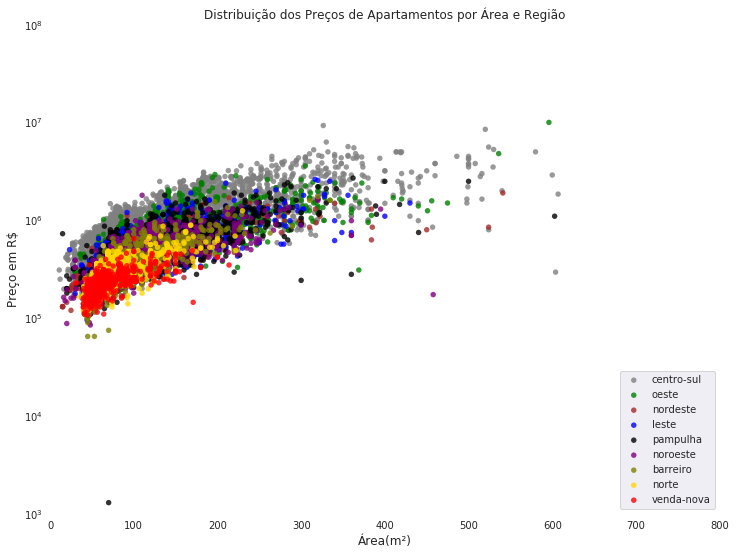

In [26]:
# Define os melhores limites para os eixos do gráfico
def Define_Axis_Limits(limit,up):
        axis_limit = 1;
        while((axis_limit * 10) <= limit):
            axis_limit *= 10;
            
        if up: axis_limit *= 10
        return axis_limit

# Traça o gráfico da distribuição de preços versus a área do imóvel.
def PlotPriceVsArea (df):
    
    # Obtem a lista de regiões da base de dados
    regions = df['Regiao'].loc[~df['Regiao'].isnull()].unique()
    data = []
    
    # Separa os dados por região
    for region in regions:
        data.append((df['Area'].loc[df['Regiao']==region] ,
                     df['Preço'].loc[df['Regiao']==region]))
    
    # Define as cores da legenda
    colors = ('gray','green','brown','blue','black','purple','olive','gold','red')
    
    # Formata a figura de exibição do gráfico
    fig = plt.figure(figsize=(8*1.5, 6*1.5))
    ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
    
    # Sepera os dados por região e cor
    for data, color, region in zip(data, colors, regions):
        x, y = data
        ax.scatter(x,y, alpha=0.8, c=color, edgecolors='none', s=30, label=region)
    
    # Configura e plota o gráfico
    plt.title('Distribuição dos Preços de Apartamentos por Área e Região')
    plt.xlim(0,800,10)
    y_lower = Define_Axis_Limits(df['Preço'].min(),False)
    y_upper = Define_Axis_Limits(df['Preço'].max(),True)
    plt.ylim(y_lower,y_upper)
    plt.semilogy()
    plt.xlabel('Área(m²)', fontsize=12)
    plt.ylabel('Preço em R$', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
# Visualizando os dados:
PlotPriceVsArea(train)

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> O gráfico acima permite identificar alguns outliers de maneira direta, como o ponto roxo na parte inferior direita e o ponto preço na parte inferior esquerda, outros porém merecem uma análise mais detalhada. Todovia a remoção de todos eles pode afetar negativamente o desempenho dos modelos, uma vez que pode haver outros outliers no conjunto de teste também. Assim, ao invés de removê-los, ir-se-á tentar criar modelos robustos o suficiente a esses dados. </div>

In [27]:
# Outlier mostrado na parte inferior esquerda do gráfico:
train.loc[(train['Preço']<10000)][['Preço','Area','Regiao','Bairro','Qtde_Quartos','Qtde_Banheiros',
                                   'Qtde_Suites','Vagas_Garagem','Valor_IPTU']]

,Preço,Area,Regiao,Bairro,Qtde_Quartos,Qtde_Banheiros,Qtde_Suites,Vagas_Garagem,Valor_IPTU
15945,1300.0000,70.0000,pampulha,Liberdade,3,1,1,1,300.0000


In [28]:
# Outliers mostrado na parte inferiror direita do gráfico:
train.loc[(train['Regiao'] == 'noroeste') & 
           (train['Area'] > 400)][['Preço','Area','Regiao','Bairro','Qtde_Quartos','Qtde_Banheiros',
                                   'Qtde_Suites','Vagas_Garagem','Valor_IPTU']]

,Preço,Area,Regiao,Bairro,Qtde_Quartos,Qtde_Banheiros,Qtde_Suites,Vagas_Garagem,Valor_IPTU
13302,173900.0000,457.7700,noroeste,Vila Oeste,2,1,0,1,0.0000


In [29]:
# Outros outliers
train.loc[(train['Area']>520)][['Preço','Area','Regiao','Bairro','Qtde_Quartos','Qtde_Banheiros',
                                   'Qtde_Suites','Vagas_Garagem','Valor_IPTU']]

,Preço,Area,Regiao,Bairro,Qtde_Quartos,Qtde_Banheiros,Qtde_Suites,Vagas_Garagem,Valor_IPTU
0,2900000.0000,600.0000,centro-sul,Luxemburgo,3,4,2,3,549.9100
1,10000000.0000,596.0000,oeste,Gutierrez,4,6,4,7,747.0000
2,2000000.0000,540.0000,centro-sul,Funcionários,4,3,2,3,816.9200
3,4800000.0000,536.0000,oeste,Gutierrez,4,5,3,6,1845.0000
4,800000.0000,524.0300,centro-sul,Centro,4,3,1,0,442.3200
5,850000.0000,524.0000,nordeste,Jardim Vitória,7,5,1,6,220.0000
8585,750000.0000,1450.0000,centro-sul,Luxemburgo,4,2,1,1,22.0500
9768,1900000.0000,541.0000,nordeste,Palmares,5,1,5,5,375.0000
9992,5000000.0000,580.0000,centro-sul,Funcionários,4,5,4,4,2143.5700
9993,5289000.0000,530.0000,centro-sul,Lourdes,4,5,2,5,1812.4000


In [30]:
# Exclusão do apartamento que possui área igual a 1450m²:
train = train.drop(train.loc[(train['Area']>1000)].index)

# Exclusão do outlier mostrado na parter inferior esquerda do gráfico:
train = train.drop(train.loc[(train['Preço']<10000)].index)

# Exclusão do outlier mostrado inferior direita do gráfico:
train = train.drop(train.loc[(train['Regiao'] == 'noroeste') & (train['Area'] > 400)].index)


columns = ['ImovelID','Preço','Area','Latitude','Longitude','Qtde_Quartos',
           'Qtde_Banheiros','Qtde_Suites','Vagas_Garagem','Valor_IPTU',
           'Valor_Cond','Bairro','Regiao','DataExtração','Rua','Numero']

train.to_csv("/home/gpassos/Documents/tcc/data/train.csv", encoding="utf-8", sep=",")

> <h4> 3.4 CORRELAÇÃO ENTRE AS VARIÁVEIS DO PROBLEMA </h4>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Ir-se-á observar agora a correlação entre as variáveis independentes do problema com a variável de interesse, o preço. A partir deste ponto, ir-se-á desconsiderar as informações de região, bairro e endereço; pois acredita-se com muita convicção que a coordenas geográficas por si só serão capazes de modelar a localidade dos imóveis. </div>

In [31]:
# Características que serão usadas para se modelar os preços dos apartamentos
train.iloc[:,1:11].sample(3)

,Preço,Area,Latitude,Longitude,Qtde_Quartos,Qtde_Banheiros,Qtde_Suites,Vagas_Garagem,Valor_IPTU,Valor_Cond
6478,365000.0000,80.0000,-19.9410,-43.9645,3,3,1,2,169.0000,450.0000
11969,550000.0000,141.0000,-19.9298,-43.9143,4,1,2,2,0.0000,300.0000
2360,440000.0000,90.0600,-19.8880,-43.9994,3,2,1,2,1.0000,462.0000


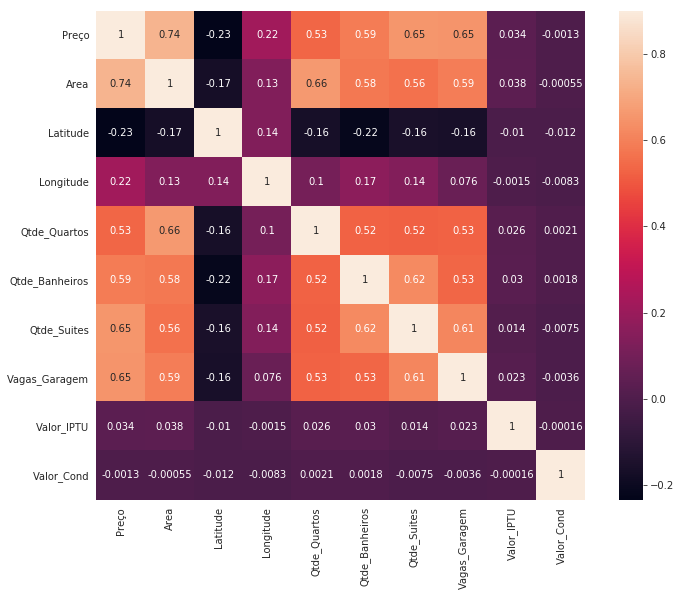

In [32]:
#Mapa de  coorelação entre as variáveis do problema:
corrmat = train.iloc[:,1:12].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9,annot=True, square=True)

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> O gráfico acima indica uma baixa coorelação das variáveis Valor_IPTU, Valor_Cond, Latitude e Longitude com a variável de interesse, <b> Preço</b>. As duas primeiras (Valor_IPTU e Valor_Cond) podem ser tranquilamente excluídas da análise; de maneira contrária, sabe-se que a latitude e a longitude carregam informações relevantes sobre os preços e não podem ser desconsideradas. Então por que essas variáveis não apresentam correlação signiticativa como se espera? </div>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Uma possível explicação para a baixa correlação das duas primeiras variáveis citadas é o fato de vários imóveis serem isentos de IPTU, não terem taxa de condomínio, ou até mesmo não possuírem essas informações cadastradas no banco de dados da Rede NetImóveis. A resposta a seguir revela que 7.634 ou aproximadamente 36% dos dados está em uma dessas situações mencionadas anteriormente, um valor bem expressivo. </div>


In [33]:
# Quantidade de imóveis que são isentos de IPTU ou não possuem taxa de condomínio
len(train.loc[(train['Valor_IPTU']==0) | (train['Valor_Cond']==0)])

7634

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> A razão da baixa correlação entre os preços dos imóveis e as coordenadas geográficas dos mesmos se deve ao fato da latitude e longitude não possuirem nenhuma propiedade ordinária, como a idade de uma pessoa. Por exemplo, os dois pontos (-19.9385153, -43.9558656) e (-19.9285010, -43.9558656) não possuem nenhum significado ou ordem de grandeza. Eles são apenas dois pontos no espaço como qualquer outro. Desde modo, a latitude e a longitude não podem ser aplicadas diretamente nos modelos de predição. </div>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Uma alternativa é utilizar um algoritmo de clausterização para criar zonas (cluster) de dados que estão geograficamente próximos. Ir-se-á utilizar o algoritmo <a href=https://bigdata-madesimple.com/possibly-the-simplest-way-to-explain-k-means-algorithm/>K-means</a>. </div>

> <h5> CLAUSTERIZAÇÃO DAS POSIÇÕES GEOGRÁFICAS DOS DADOS </h5>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Ao se analisar a distribuição geográfica dos dados do conjunto de treino, observa-se várias zonas de clausterização e também alguns outliers (dados com informações geográficas não consistente com a região classificada). Para se determinar o número ideal de clusters na distribuição dos dados, pode-se utilizar o método do cotovelo (<a href=https://en.wikipedia.org/wiki/Elbow_method_(clustering)>Elbow Method</a>) que consiste em encontrar visualmente o ponto de maior inflexão da curva números de clusters vs. erro do proceso de clausterização.</div>

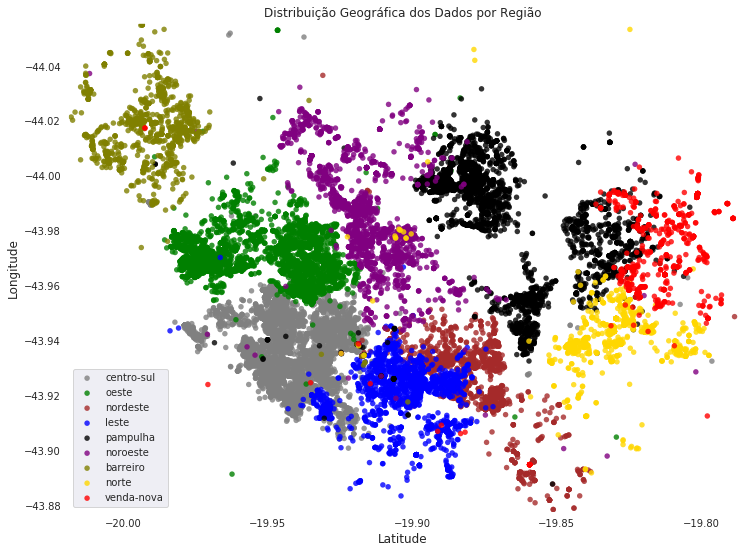

In [34]:
# Plota a distribuição geográfica dos dados

def Remove_Bright_Colors(colors):
    bright_colors = ['white','snow','w','whitesmoke', 'blanchedalmond','ghostwhite',
                    'azure','aliceblue','mintcream','ivory','floralwhite','oldlace',
                    'cornsilk','papayawhip','lightgoldenrodyellow','antiquewhite',
                    'lavenderblush','linen','lemonchiffon','honeydew','mistyrose',
                    'lightgray','lightgrey','peachpuff']
    
    for color in bright_colors:
        colors.remove(color)
    
    return colors
    
   
def PlotLocations(df,clusters = False, title = None):
    # Sepera todas as regiões
    regions = df['Regiao'].loc[~df['Regiao'].isnull()].unique()
    # Lista contendo os dados seperados por região
    data = []
    # Loop para separar os dados por região
    for region in regions:
        data.append((df['Latitude'].loc[df['Regiao']==region] ,
                     df['Longitude'].loc[df['Regiao']==region]))
    
    # Cores que aperação no gráfico
    colors = ('gray','green','brown','blue','black','purple','olive','gold','red')
    
    # Cores que aperação no gráfico de clusters
    if clusters:
        colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
        colors = Remove_Bright_Colors(colors)
        random.shuffle(colors)
        colors = colors
    
    # Dimensona o tamanho da figura
    fig = plt.figure(figsize=(8*1.5, 6*1.5))
    ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
    
    # Posiciona o pontos
    for data, color, region in zip(data, colors, regions):
        x, y = data
        ax.scatter(x,y, alpha=0.8, c=color, edgecolors='none', s=30, label=region)
    
    # Configura o gráfico
    plt.title(title)
    #----------------------------
    x_lower = df['Latitude'].min()
    x_upper = df['Latitude'].max()
    y_lower = df['Longitude'].min()
    y_upper = df['Longitude'].max()
    x_resolution = abs(x_upper-x_lower)/len(df)
    y_resolution = abs(y_upper-y_lower)/len(df)
    x_lower = x_lower - 100*x_resolution
    x_upper = x_upper + 100*x_resolution
    y_lower = y_lower - 100*y_resolution
    y_upper = y_upper + 100*y_resolution
    plt.xlim(x_lower,x_upper,x_resolution)
    plt.ylim(y_upper,y_lower,y_resolution)
    #-------------------------------------
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel('Longitude', fontsize=12)
    if not clusters: plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()
    
# Visualizando os dados:
PlotLocations(train,clusters=False,title ='Distribuição Geográfica dos Dados por Região')

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Contudo, sabe-se que dividir a distribuição de preços dos imóveis no território da cidade nas noves regiões mostradas é uma aproximação bastante grosseira. Vamos, portanto, definir uma quantidade de centroides tal que permita cada cluster ter no mínimo 0,5% dos dados (82 amostras) do conjunto de treino. Após uma série de tentativas, verificou-se que 60 centroides é a quantidade limiar da regra estabelecida. Acima desse valor, os dados ficam melhores subdivididos no espaço mas algumas regiões apresentam uma quantidade ínfima de amostras. </div>

/usr/local/lib/python3.5/dist-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


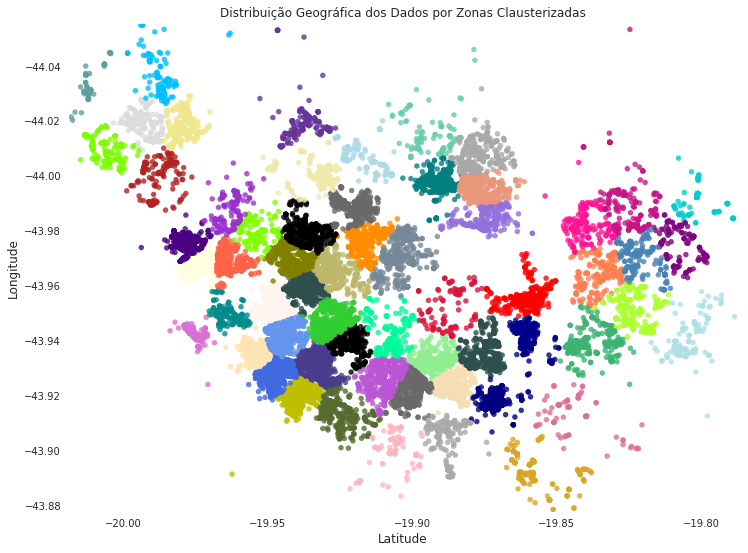

In [35]:
import sklearn
from sklearn.cluster import KMeans
# Encontra a distribuição de clusters que atende a regra estabelicida (cada cluster deve ter no mínimo 82 dados)
while True:
    # Define o número de centroides
    clusters = KMeans(50)
    # Determina os clusters
    clus = clusters.fit_predict(train[['Latitude', 'Longitude']])
    centros = np.unique(clus)
    clus = list(clus)
    # Verifica se a regra foi atendida
    data = []
    for centro in centros:
        if clus.count(centro) < 107:
            data.append((clus.count(centro)))
    
    if len(data)==0:
        break

# Define o número de centroides
clusters = KMeans(60)
# Determina os clusters
clus = clusters.fit_predict(train[['Latitude', 'Longitude']])
centros = np.unique(clus)
clus = list(clus)
        
        
# Organiza os clusters e os dados
clusters_df = pd.DataFrame({"ImovelID":train['ImovelID'],"Latitude":train['Latitude'], 
                            "Longitude":train['Longitude'],"Regiao":clus})
# Exibe o gráfico:
PlotLocations(clusters_df,clusters=True,
              title = 'Distribuição Geográfica dos Dados por Zonas Clausterizadas')

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> O resultado mostrado na imagem anterior indica que a aproximação da distribuição geográfica dos preços por 50 zonas distintas é razoável. Ao se computar a média e o desvio padrão de cada umas regiões mostradas na Figura 22,
cria-se mais duas variáveis, Mean_PreçoZone e Std_PreçoZone, no conjunto de dados. A
matriz de correlação mostrada a seguir revela que essas duas novas variáveis possuem uma
relação significativa com os preços e ajudam agregar valor quantitativo à localidade dos imóveis. </div>

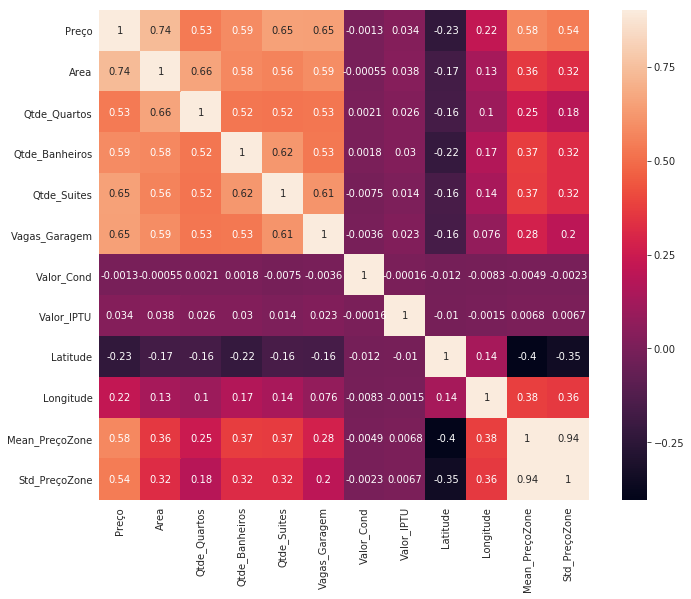

In [36]:
def transform_prices (train, clusters):
    # Determina o cluster de cada amostra
    clus = clusters.predict(train[['Latitude', 'Longitude']])

    # Associa os clusters às colunas ImovelID e Preço
    zonas = pd.DataFrame({"ImovelID":train['ImovelID'],"Zona":clus,"Preço":train['Preço']})

    # Cria um Dataframe Zonas_Preço que associa a média e o desvio padrão de cada cluster 
    centros = np.unique(clus)
    zonas_preço = pd.DataFrame({"Zona":centros})
    zonas_preço['Mean_PreçoZone'] = 0
    zonas_preço['Std_PreçoZone'] = 0

    # Computa a média e o desvio padrão dos preços de cada zona
    for centro in centros:
        preço_metro = zonas.loc[zonas['Zona']==centro]['Preço']
        zonas_preço.iloc[zonas_preço.loc[zonas_preço['Zona']==centro].index,1] = preço_metro.mean()
        zonas_preço.iloc[zonas_preço.loc[zonas_preço['Zona']==centro].index,2] = preço_metro.std()

    # Insere no dataframe train a média e o desvio padrão de cada zona
    train = pd.merge(train,
                      pd.merge(zonas,zonas_preço,on="Zona",how='left')[["ImovelID",'Zona',
                                                                        'Mean_PreçoZone','Std_PreçoZone']],
                      on="ImovelID", how= 'inner')

    columns = ['ImovelID','Preço','Area','Qtde_Quartos','Qtde_Banheiros','Qtde_Suites',
               'Vagas_Garagem','Valor_Cond','Valor_IPTU','Latitude','Longitude','Mean_PreçoZone',
               'Std_PreçoZone']

    train = train[columns]
    
    return train, zonas_preço

train, zonas_preço = transform_prices (train.iloc[:,0:11], clusters)
# Mapa de coorelação entre as variáveis do problema:
corrmat = train.iloc[:,1:13].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9,  annot=True, square=True)

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Finalmente, o mapa de correlação mostrado acima indica que a transformação de variáveis realizada enriqueceu bastante as informações do problema. Portanto, as características que serão utilizadas para modelar os preços dos apartamentos são as seguintes: 

<div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> 
<ul> <ul> <ol>
<li> Área; </li> 
<li> Quantidade de suítes; </li> 
<li> Quantidade de vagas de garagem; </li> 
<li> Quantidade de banheiros; </li> 
<li> Quantidade de quartos; </li>
<li> Valor do condomínio; </li>
<li> Valor do IPTU; </li>
<li> Latitude; </li>
<li> Longitude; </li> 
<li> Preço médio dos imóveis da região; </li>  
<li> Desvio padrão dos preços dos imóveis da região. </li> </div> </ol> </ul>  </ul>

> <h4> 3.3 VARIÁVEIS COM DISTRIBUIÇÕES ASSIMÉTRICAS </h4>

> <h5> NORMALIZANDO AS DISTRIBUIÇÕES </h5>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> A distribuição normal, ou distribuição gaussiana, é a distribuição preferida dos estatísticos e dos cientistas de dados por serem capazes de modelar uma vasta quantidade de fenômenos naturais e por tornarem as operações matemáticas de análise relativamente simples, se comparadas à de outras distribuições. Ademais, o teorema central do limite 9 afirma que quando se aumenta a quantidade de amostras de um evento, a distribuição amostral da sua média aproxima-se cada vez mais de uma distribuição normal. Como foi visto no Capítulo 3, os algoritmos de aprendizado de máquina são fundamentalmente baseados em modelos matemáticos; portanto,
esses algoritmos tendem a performar melhor quando os dados estão distribuídos conforme uma
distribuição normal. </div>


 mu = 566225.92 and sigma = 488912.85



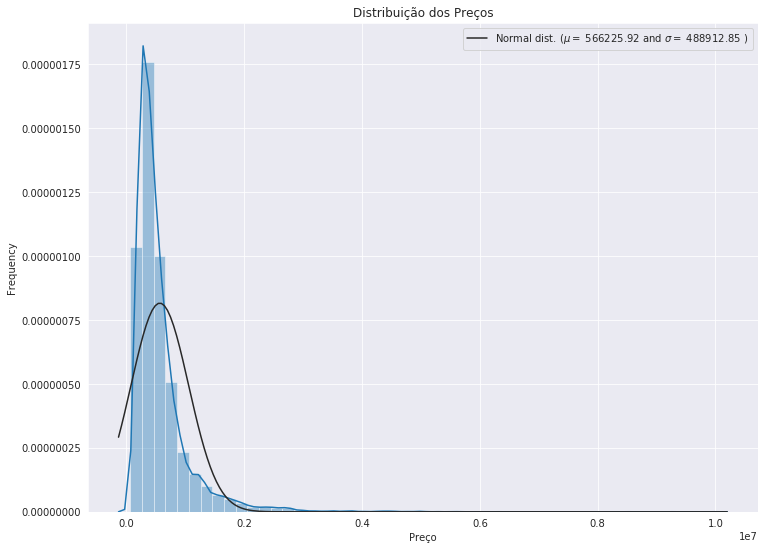

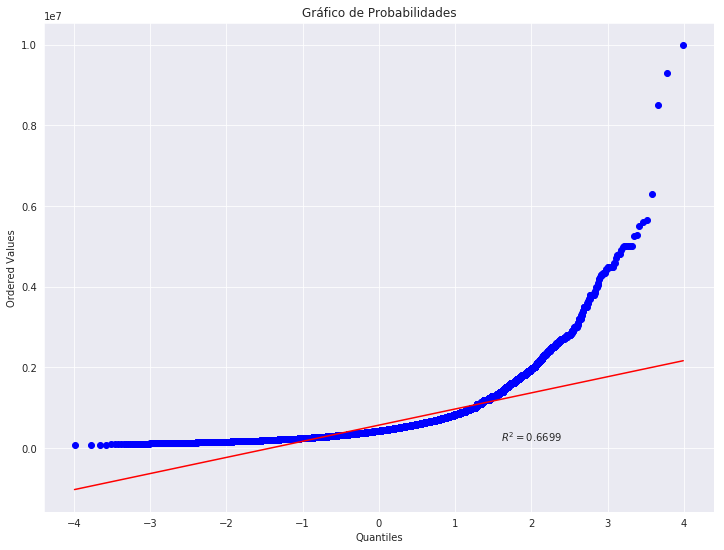

In [37]:
# Gerando o SeaBorn gráfico que mostra a distribuição dos preços
def IsDataNormDistribued(df):
    
    # Gera o Seaborn gráfico que mostra a distrubição dos dados
    a4_dims = (8*1.5, 6*1.5)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    fig.set_size_inches(8*1.5, 6*1.5)
    sns.distplot(df['Preço'] , fit=norm, ax=ax);

    # Calcula a distribuição normal que mais se aproxima dos daos
    (mu, sigma) = norm.fit(df['Preço'])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    # Plota o gráfico de distribuição
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Distribuição dos Preços')

    # Plota o gráfico de probabilidades
    fig = plt.figure(figsize=(8*1.5, 6*1.5))
    y_lower = Define_Axis_Limits(df['Preço'].min(),False)
    Define_Axis_Limits(90,False)
    res = stats.probplot(df['Preço'], plot=plt)
    plt.title('Gráfico de Probabilidades')
    plt.show()

IsDataNormDistribued(train)

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> O gráficos acima sugerem que a distribuição dos preços não segue uma distribuição normal, algo que não é desejável. Realizar-se-á uma transformação logarítma (log(1+x)) nos preços dos apartamentos na esperança de tornar a distribuição desses dados mais próxima de uma distribuição "normal". </div>


 mu = 13.02 and sigma = 0.63



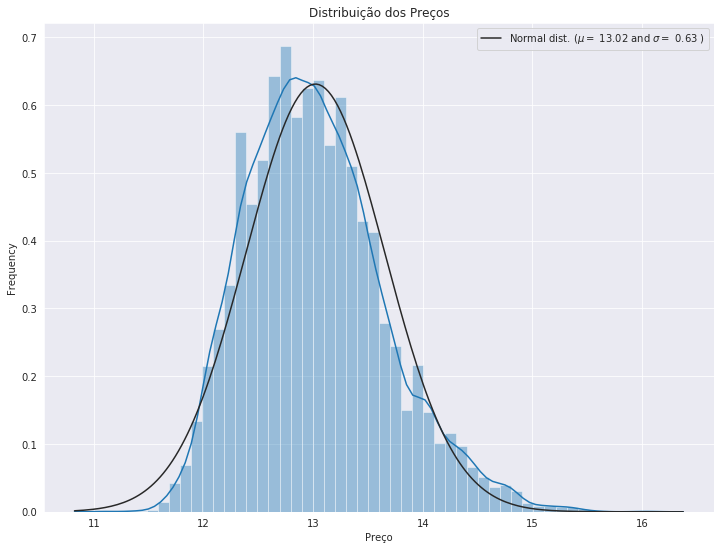

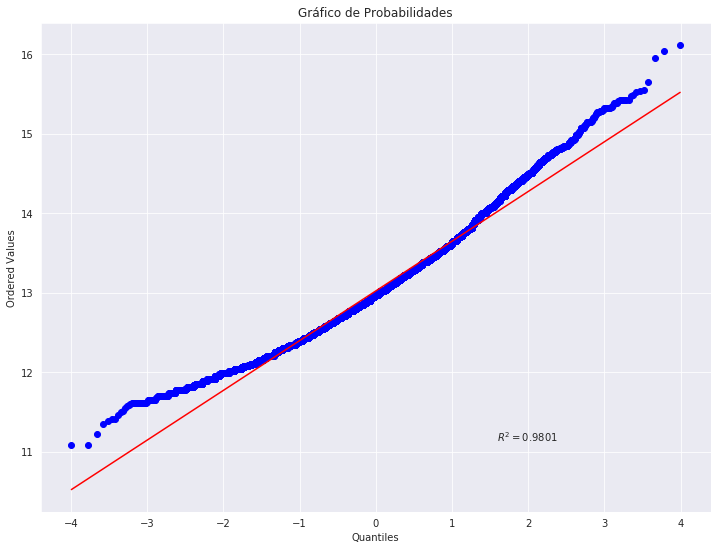

In [38]:
# Utilziando a função log1p da bibloteca tnumpy 
# que aplica a transformação log(1+x) em todos elementos de uma coluna
train['Preço'] = np.log1p(train['Preço'])
IsDataNormDistribued(train)

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Pode se observar nos gráficos acima que a distribuição dos preços está bem mais próxima de uma distribuição normal. </div>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Uma outra análise a ser realizada é com relação a assimetria das distribuições das variáveis independentes. A assimetria (em inglês: skewness) mede o quanto a cauda lado esquerdo de uma distribuição é maior do que a cauda do lado direito ou vice-versa. Uma assimetria positiva indica que a cauda do lado direito é maior que a do lado esquerdo e uma assimetria negativa, obviamente, indica o contrário. </div>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> A bibloteca pandas oferece uma função chamada "skew", viés em português, que determina o quão assimétrica a distribuição de um conjunto de dados está em relação à sua distribuição normal. Neste <a hrer=http://www.pythonforfinance.net/2016/04/04/python-skew-kurtosis/>link</a> há mais detalhes sobre o que essa função faz. Ir-se-á, portanto, utilizar a função skew para identificar variáveis no conjunto de treino que apresentam uma assimetria elevada. </div>



In [39]:
# Quantidade de variáveis do conjunto de treino com distribuição assimétrica
numeric_feats = train.iloc[:,2:14].dtypes[train.iloc[:,2:14].dtypes != "object"].index
# Verificando a assimetria das variaveis do problemaa
skewed_feats = train.iloc[:,2:14][numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_train = pd.DataFrame({'Assimetria' :skewed_feats})
# Variaveis com distribuição assimétrica no conjunto de treino
skewness_train.head(11)

,Assimetria
Valor_Cond,143.6802
Valor_IPTU,81.6895
Vagas_Garagem,3.0675
Area,2.1436
Qtde_Banheiros,2.1179
Mean_PreçoZone,1.4953
Std_PreçoZone,1.3009
Qtde_Suites,1.1771
Latitude,0.4521
Qtde_Quartos,0.0391


> <h5> TRANSFORMAÇÃO BOX COX NAS VARIÁVEIS ALTAMENTE ENVIESADAS </h5>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Este <a href=http://onlinestatbook.com/2/transformations/box-cox.html>artigo</a> explica resumidamente no que se consiste a transformação Box Cox. Vamos utilizar a função "boxcox1p" que computa a tranformação Box Cox de 1 + x. Oberseve que ao definir lambda=0 é o mesmo que usar a tranformação logaratma feita na variável preço anteriormente.  </div>

In [40]:
from scipy.special import boxcox1p
# Seleciona as variáveis que possuem coefieciente de assimétria maior do 1
skewness = skewness_train[abs(skewness_train.Assimetria)>1]
# Realiza a tranformação Box Cox utilizando lambda = 0.5
skewed_features = skewness.index
lam = 0.5
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)

numeric_feats = train.iloc[:,2:14].dtypes[train.iloc[:,2:14].dtypes != "object"].index
# Verificando a assimetria das variaveis do problema
skewed_feats = train.iloc[:,2:14][numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_train = pd.DataFrame({'Assimetria' :skewed_feats})
# Variaveis com distribuição assimétrica no conjunto de treino
skewness_train.head(11) 

train.to_csv("/home/gpassos/Documents/tcc/data/train_transformed.csv", encoding="utf-8", sep=",")

<h3> 4. MODELAGEM E PREDIÇÃO DOS PREÇOS DO CONJUNTO DE TESTE</h3>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Nesta etapa, avaliar-se-á a perfomance dos principais modelos de regressão da biblioteca <a href=http://scikit-learn.org/stable/>scikit-learn</a> na predição dos preços do conjunto de teste. </div>

In [41]:
# Obtendo algumas biblotecas importantes para essa etapa.
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.base import clone
from sklearn.model_selection import KFold
import time
import xgboost as xgb
import lightgbm as lgb

> <h4> 4.1 DEFININDO UMA ESTRATÉGIA DE VALIDAÇÃO CRUZADA </h4>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> O principal objetivo de se utilizar algoritmos de aprendizado de máquina em problemas da vida real é obter um modelo computacional que seja capaz de produzir respostas eficazes para situações novas de um mesmo problema. Em outras palavras, a relevância dos resultados dos modelos está atrelada ao desempenho dos mesmos na predição das amostras do conjunto de teste, pois não faz sentido prático predizer os resultados das amostras de treino. Assim, faz-se necessário definir uma estratégia de validação da predição dos preços das 21.232 amostras. </div>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Uma maneira de se resolver tal problema é usar a técnica denominada k-fold Cross Validation (JAMES et al., 2014), popularmente conhecida entre os cientistas de dados. Basicamente, essa técnica consiste em dividir as amostras aleatoriamente em k grupos, ou dobras (em inglês: folds), de tamanho aproximado. Então, o primeiro grupo k1 de amostras é usado como conjunto de validação e os k − 1 grupos restantes são usados como conjunto de treino. O erro quadrático médio (EQM) (em inglês: mean squared error ou MSE) do experimento é computado e armazenado. Esse processo é repetido k vezes e, em cada vez, um grupo diferente de amostras ki é tratado como conjunto de validação e os restantes ki − 1 grupos são usados como conjunto de treino. Esse procedimento produz então k estimativas de erros de testes, MSE1, MSE2 , . . . ,MSEk . Desse modo, a estimativa de erro do procedimento k-fold Cross Validation é definida pela média dos MSE k erros computados em cada experimento  </div>

In [42]:
# Função para associação da média e do desvio padrão dos preços ao dados de teste
def transform_test_set(test,clusters,zonas_preço):
    
    clus = clusters.predict(test[['Latitude', 'Longitude']])

    # Concatena a média e o desvio padrão do preços no conjunto de treino
    zonas = pd.DataFrame({"ImovelID":test['ImovelID'],"Zona":clus})
    test = pd.merge(test,
                      pd.merge(zonas,zonas_preço,on="Zona",how='left')[["ImovelID",'Mean_PreçoZone',
                                                                        'Std_PreçoZone','Zona']],
                      on="ImovelID", how= 'inner')

    columns = ['ImovelID','Preço','Area','Qtde_Quartos','Qtde_Banheiros','Qtde_Suites',
               'Vagas_Garagem','Valor_Cond','Valor_IPTU','Latitude','Longitude','Mean_PreçoZone',
               'Std_PreçoZone']

    test=test[columns]
    
    return test


# Função de validação cruzada
def cross_validation_score(estimator,X,clusters,n_folds=5): 
    # Shuffling o conjunto de dados
    X = X.sample(frac=1).reset_index(drop=True) 
    kf = KFold(n_splits = n_folds, shuffle = True, random_state = 2)
    # Coluna auxiliares
    X['Real_PreçoT'] = 0
    X['Pred_Preço'] = 0
    # Listas auciliares
    MAPE = []
    less_10per = []
    less_20per = []
    time_lst = []
    # Filtros de colunas
    column = X.columns.get_loc('Pred_Preço')
    columns = [x for x in X.columns if x not in ['Preço','ImovelID','Real_PreçoT','Pred_Preço']]
    columns.append('Mean_PreçoZone')
    columns.append('Std_PreçoZone')
    
    for train_index, test_index in kf.split(X):
        # inicia a contagem de tempo
        start = time.time()
        # Calcula a média e o desvio padrão dos preços dos dados treino
        train_set, zonas_preço = transform_prices(X.iloc[train_index],clusters)
        # Treina o modelo
        estimator.fit(train_set.loc[:,columns],train_set.Preço)
        
        # Associa a média e os preços dos dados de treino ao conjunto de teste
        test_set = transform_test_set(X.iloc[test_index],clusters,zonas_preço)
       
        # Prediz o preços dos dados de treino
        X.iloc[test_index,column]=np.expm1(estimator.predict(test_set.loc[:,columns]))
        # Encerra contagem
        end = time.time()
        
        APE = abs(np.expm1(X.loc[test_index].Preço)- 
                  X.loc[test_index].Pred_Preço)/np.expm1(X.loc[test_index].Preço)
        MAPE.append(APE.mean())
        less_10per.append(len(APE.loc[APE<0.1])/len(APE))
        less_20per.append(len(APE.loc[APE<0.2])/len(APE))      
        time_lst.append(end-start)
    
    # Computa o Erro Absoluto Percentual
    X['APE'] = abs(np.expm1(X.Preço)- 
                  X.Pred_Preço)*100/np.expm1(X.Preço)
    
    # Preços reais
    X['Real_PreçoT'] = np.expm1(X['Preço'])
    
    # Calcula o Erro Médio Absoluto Perceutal
    MAPE = np.array(MAPE).mean()*100
    less_10per = np.array(less_10per).mean()*100
    less_20per = np.array(less_20per).mean()*100
    time_ = np.array(time_lst).mean()
    m, s = divmod(time_, 60)
    
    columns = ['MAPE','Dentro de ± 10%','Dentro de ± 20%', 'Tempo Médio Pred.']

    # Resposta
    return X,pd.DataFrame({'MAPE':'{:.3f}'.format(MAPE) + "%",
                         'Dentro de ± 10%':'{:.3f}'.format(less_10per) + "%",
                         'Dentro de ± 20%':'{:.3f}'.format(less_20per) + "%",
                         'Tempo Médio Pred.':"%02dmin %02dsec" %(m, s)}, index=[0])[columns]
    

> <h4> 4.1 PRINCIPAIS MODELOS BASE DA BIBLIOTECA DO SCKIT-LEARN</h4>


In [43]:
from sklearn.linear_model import LinearRegression
linear_regression = make_pipeline(RobustScaler(),
                                  LinearRegression(fit_intercept=True, normalize=False, 
                                                   copy_X=True, n_jobs=None))

> <h5> LASSO Regression </h5>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Este modelo é bem sensível a outliers. Ir-se-á torná-lo mais robusto utilizando o método <b>Robustscaler()</b>. </div>

In [44]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.01, random_state=1))

> <h5> Elastic Net Regression </h5>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Igualmente ao anterior, esse modelo é também bem sensível a outliers. Ir-se-á torná-lo mais robusto utilizando o método <b>Robustscaler()</b>. </div>

In [45]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.001, l1_ratio=.9, random_state=3))

> <h5> Support Vector Regression: </h5>


In [46]:
KRR = KernelRidge(alpha=0.01, kernel='polynomial', degree=2, coef0=2.5)

> <h5> Multi-layer Perceptron </h5>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Definiu-se o número de camadas escondidas igual a 1000 e a função a unidade linear retificada como função de ativação dos neurônios.
Ademais, definiu-se o método de otimização estocástico gradient-based para ajustes dos pesos w dos neurônios. </div>

In [47]:
mlp = MLPRegressor(hidden_layer_sizes=(1000, ), activation='relu', solver='adam', alpha=0.0001, 
             batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
             max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, 
             warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
             validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)


> <h5> Gradient Boosting: </h5>

In [48]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.1,
                                   max_depth=6, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

> <h5> Xtreme GBoost: </h5>

In [49]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.1, max_depth=6, 
                             min_child_weight=1.7817, n_estimators=3000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

> <h5> LightGBM: </h5>

In [50]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=6,
                              learning_rate=0.05, n_estimators=3000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

> <h4> 4.2 RESULTADOS</h4>

> <div style="text-align: justify; LINE-HEIGHT:30px; FONT-FAMILY:Arial"> Abaixo são apresentados os resultados dos experimentos. </div>

In [51]:
# Resultado LASSO
df_lreg,df_lreg_resume = cross_validation_score(linear_regression,train.iloc[:,0:11],clusters)
df_lreg_resume

,MAPE,Dentro de ± 10%,Dentro de ± 20%,Tempo Médio Pred.
0,18.882%,34.853%,63.206%,00min 00sec


In [52]:
# Resultado Regressão Linear
df_lasso,df_lasso_resume = cross_validation_score(lasso,train.iloc[:,0:11],clusters)
df_lasso_resume

,MAPE,Dentro de ± 10%,Dentro de ± 20%,Tempo Médio Pred.
0,18.905%,34.929%,62.528%,00min 00sec


In [53]:
# Resultado GBoost
df_gboost,df_gboost_resume =cross_validation_score(GBoost,train.iloc[:,0:11],clusters)
df_gboost_resume

,MAPE,Dentro de ± 10%,Dentro de ± 20%,Tempo Médio Pred.
0,11.905%,55.975%,81.337%,00min 40sec


In [54]:
# Resultado XGBoost
df_xgb,df_xgb_resume = cross_validation_score(model_xgb,train.iloc[:,0:11],clusters)
df_xgb_resume

,MAPE,Dentro de ± 10%,Dentro de ± 20%,Tempo Médio Pred.
0,12.179%,54.548%,80.955%,00min 13sec


In [55]:
# Resultado Light Gboost
df_lgb,df_lgb_resume = cross_validation_score(model_lgb,train.iloc[:,0:11],clusters)
df_lgb_resume

,MAPE,Dentro de ± 10%,Dentro de ± 20%,Tempo Médio Pred.
0,13.662%,47.878%,76.975%,00min 01sec


In [56]:
# Resultado da Rede de Percepetrons de Multicamadas
from sklearn import preprocessing
columns = ['Area','Qtde_Quartos','Qtde_Banheiros','Qtde_Suites',
           'Vagas_Garagem','Valor_Cond','Valor_IPTU','Latitude','Longitude']

x = train.iloc[:,2:11].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=columns)
df = pd.concat([train.iloc[:,0:2],df],axis=1)
df_mlp,df_mlp_resume = cross_validation_score(mlp,df,clusters)
df_mlp_resume

,MAPE,Dentro de ± 10%,Dentro de ± 20%,Tempo Médio Pred.
0,19.915%,33.360%,60.399%,00min 27sec
